<div style="margin: 2em 5em 0 0;">
    
<p>
   <br>
   <span style="margin-left: 17%; vertical-align: text-bottom;">Business Analytics &nbsp;&bullet;&nbsp; Class of 2021 &nbsp;&bullet;&nbsp; Hult International Business School</span>
   <span style="float: right; vertical-align: text-bottom">Fall 2020</span>
</p>
<br>
<hr style="height: 1px; margin-top: -.2em">


<center>
   <br>
   <span style="font-size: 155%; font-weight: bold; font-family: "Times New Roman", Times, serif;">
      A2: Data Analysis Team Project 
      <br style="margin-bottom: .6em">
      Caribbean Islands & Parts of Latin America  
   </span>
   <br>
   <br>
   <br>
   <b>Team 9,&nbsp; Data Science: Python</b>
   <br>
   <div style="font-size: 107%; margin-top: .3em">
      <b>Instructor: Prof. Chase Kusterer</b>
      <br style="margin-bottom: .5em">
      Baillie Allen
      <br>
      Carlos Andres Restrepo Ayala
      <br>
      Burcu Dogru
      <br>
      Jeanne Ron Leong Moon Tsien
      <br>
      Kevin Zagrean
       
   </div>
   <div style="margin-top: .5em">November 4th, 2020</div>
</center>
 </div>
   <div style="margin-top: bold; .6em">Summary</div>
</center>
 </div>
<p>This report conducts an exploratory analysis related to 19 countries from the region Caribbean Islands and Parts of Latin America, utilizing the data from the World Bank dataset. The aim of this analysis is to understand the region from a technical and a non-technical perspective while formulating a strategy for missing values and identifying outliers of the dataset.<p>
</center> 
 </div>    
<p>***Special Thank you to Dachao Sun for sharing his html code for the title markdown cell and the headings for this report.***  </p>  
<br>
<br>


<div style="margin: 2em 5em 0 0; color: ">

# Introduction
<p>The Caribbean represents a group of culturally and biologically diverse islands famous for their enchanting scenery, crystal clear waters and amazing biodiversity. This region consists of over 700 islands many of which are popular tourist destinations. 

The Caribbean is also known to have high cultural and socioeconomic diversity. Early inhabitants of the Caribbean region were indigenous people from the South American continent. However, European colonization decimated the native population and brought disease, war and many enslaved Africans. In present day, the majority of the Island populations are descendants of these slaves. The remainder of the population is made up of a mix of cultures from all over the world. 
With an exception of Haiti (the least-developed country in the Americas), most islands in the Caribbean are considered to have a middle to high income making economic disparity significant amongst the countries. The lax tax laws may contribute to this disparity in many of the countries.<p>
    
    
   
</div>

In [ ]:
# importing packages need for our analysis 
import pandas as pd # data science essentials
import numpy as np 
import matplotlib.pyplot as plt # NEW: data visualization essentials
import seaborn as sns # NEW: enhanced data visualization
import openpyxl 

In [ ]:
#downloading our dataset 
file = "./datasets/Final_Project_Dataset.xlsx"

# reading the file into Python through pandas
Final = pd.read_excel(io = file,
                   sheet_name = 'Data',
                   header = 0)


# checking results
Final.info()


In [ ]:
#converting population from int to float 

data_types = {"Population, total" : float}

Final = pd.read_excel(io = file, 
                   sheet_name = 'Data',
                   header = 0,
                   dtype=data_types)
# checking that we were able to convert population
Final.info()

<div style="margin: 2em 5em 0 0; color: ">

## Region: Caribbean Islands and Parts of Latin America
    
<p>Our Region includes 19 countries,they are: Aruba, Antigua and Barbuda, Bahamas, The Barbados, Cuba, Cayman Islands, Dominica, Dominican Republic, Grenada, Haiti, Jamaica, St. Kitts and Nevis, St. Lucia, Puerto Rico, Turks and Caicos Islands, Trinidad and Tobago, St. Vincent and the Grenadines, British Virgin Islands, Virgin Islands (U.S.).<p>

In [ ]:
#narrowing down the data set to just our region 
Caribbean=Final.loc[ : , : ][Final.loc[ : ,'Cool Name']== 'Ratchet']

#viewing the data
Caribbean.head(n=5)


<div style="margin: 2em 5em 0 0; color: ">

# Flagging
    
<p>We have decided to work from a general perspective to a more detailed. Firstly, we identified, with true or false, then the exact number, absolute value, of missing values per variable, and lastly, as a percentage. The percentage made the variables more comparable for later use.<p> 

In [ ]:
#which cells have missing data? True= missing, False = no missing 
print(Caribbean.isnull().any()) 

In [ ]:
#viewing exactly how many variables are missing
print(Caribbean.isnull().sum(axis=0))

In [ ]:
# mean() is giving us the average percentage of missing values in each column 
print(Caribbean.isnull().mean(axis=0).round(decimals= 2))

<div style="margin: 2em 5em 0 0; color: ">

## 45% Rule

<p>As mentioned earlier, the diversity of Caribbean Islands and Parts of Latin America was our first challenge we faced. To overcome this, we made our first assumption as a group; we're going to focus on analyzing the columns which have the most reliable data available. This strategy consisted of putting any columns which had more than %45 of the data points missing aside. This narrowed down the amount of features we had to choose from.<p>

In [ ]:
#Creating a subset of variables with less than 45% missing data
caribbean_subset = Caribbean[['Country Code Total',\
                              'Country Name',\
                             'Adolescent fertility rate (births per 1,000 women ages 15-19)',\
                             'CO2 emissions (metric tons per capita)',\
                             'Contributing family workers, male (% of male employment)',\
                             'Contributing family workers, total (% of total employment)',\
                             'Employment to population ratio, 15+, female (%) (modeled ILO estimate)',\
                             'Employment to population ratio, 15+, male (%) (modeled ILO estimate)',\
                             'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',\
                             'Fertility rate, total (births per woman)',\
                             'GNI per capita, Atlas method (current US$)',\
                             'Immunization, measles (% of children ages 12-23 months)',\
                             'Improved sanitation facilities (% of population with access)',\
                             'Improved water source (% of population with access)',\
                             'Incidence of tuberculosis (per 100,000 people)',\
                             'Internet users (per 100 people)',\
                             'Life expectancy at birth, total (years)',\
                             'Maternal mortality ratio (modeled estimate, per 100,000 live births)',\
                             'Mobile cellular subscriptions (per 100 people)',\
                             'Mortality rate, infant (per 1,000 live births)',\
                             'Net ODA received per capita (current US$)',\
                             'Population, total',\
                             'Prevalence of undernourishment (% of population)',\
                             'Proportion of seats held by women in national parliaments (%)',\
                             'Self-employed, total (% of total employment)',\
                             'Trade (% of GDP)',\
                             'Tuberculosis death rate (per 100,000 people), including HIV']]


<div style="margin: 2em 5em 0 0; color: ">

# Five Unique Features for the Caribbean Islands and Latin America
 
<p>After creating the subset consisting of 26 features, we moved further in our analysis and then went to the data to see what it would show. At first we only looked at the outside research and found that health, economy and climate change were all major issues. We then went to the data to see what it would show. After using cleaning we looked at comparative boxplots to see if we could identify any "trends".Once this was done it became clear that we were biasing our results, especially for features that were still missing a large amount of data.<p> 
    
<p>This gave us pause, ultimately we decided to go with a combined approach. Choosing features which had a good amount of data and that seemed appropriate based on the outside research we had done. Though it was a difficult decision as many fit these criteria, we are confident that the 5 chosen are representative our region.<p>
    
<p>We also found that when looked at from a global perspective the Mobile Cellular subscription feature was surprisingly unique to the region and merited further exploration.<p>

</div>  

In [ ]:
#sizing the figure
fig, ax = plt.subplots(figsize = (10,10))


# Boxplot comparision of the Cell subscritpions of each region
sns.boxplot(x      = 'Mobile cellular subscriptions (per 100 people)',  # x-variable
            y      = 'Hult Region',     # optional y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = Final) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label   = 'Mobile cellular subscriptions (per 100 people) Global Comparison')
plt.xlabel(xlabel = 'Mobile cellular subscriptions (per 100 people)')
plt.ylabel(ylabel = 'Region of the world')
plt.show()

<div style="margin: 2em 5em 0 0; color: ">

# Representative Country: Dominican Republic
 
<p>In order to narrow down the one country that best represents the region, we filtered the dataset by missing values. This gave us the five countries that had all data points present. With a subset of our chosen features we compared these countries with the below bar graphs. We chose the country that had the closest data point to the mean of each feature. This gave us the Dominican Republic.
</p>
    
</div>

In [ ]:
# Creating the flags for missing data

for col in caribbean_subset:
    if caribbean_subset[col].isnull().any():
        caribbean_subset['m_'+col] = caribbean_subset[col].isnull().astype(int)


In [ ]:
# the following code makes the n independent
caribbean_subset_dropped = pd.DataFrame.copy(caribbean_subset)


# using dropna() to creat new subset
caribbean_subset_dropped = caribbean_subset_dropped.dropna().round(2)


# checking to see if all missing values have been dropped
print(caribbean_subset_dropped.isnull().sum())


In [ ]:
# This is the dataset when the countries with missing data are eliminated

caribbean_subset_dropped

In [ ]:
# Bar chart to compare countries based on 5 variables chosen as representative of the region 

# setting figure size
fig, ax = plt.subplots(figsize = [8,6])

# bar chart
sns.barplot(x      = 'Mortality rate, infant (per 1,000 live births)',  # x-variable
            y      = 'Country Name',     # optional y-variable
            hue    = None,     # optional categorical feature
            data   = caribbean_subset_dropped) # DataFrame where features exist

plt.axvline(x = caribbean_subset_dropped['Mortality rate, infant (per 1,000 live births)'].mean(),#Add a vertical line across the axes. I this case the mean
            color = 'black',
            linestyle= '--')

# formatting and displaying the plot
plt.legend(labels =  ['Mean'])         # Place a legend with the axes.
plt.title(label   = 'Mortality rate, infant (per 1,000 live births) ')
plt.xlabel(xlabel = 'Mortality rate, infant (per 1,000 live births)')
plt.ylabel(ylabel = 'Country Name')
plt.show()

<div style="margin: 2em 5em 0 0; color: ">

## Comparison of Infant Mortality Rate
 
<p>On average, the Dominican Republic has an infant mortality rate of 29 deaths per 1,000 live births which is around the average of the five countries. This figure was relatively moderate in comparison to Haiti with 62 deaths per 1,000 live births. Further research found that the high figure could be attributed to the availability of food supply. According to the nutritional and health surveillance data, high cost in food prices led to an increase of mortality rate (Christian, 2010). Haiti being heavily affected by natural disasters are subject to rising costs of sustenance. Many households reduce their defer expenditure on essential items such as health care and reduce nutritional intake in order to cope. Furthermore, the graphs show that Cuba has the lowest infant mortality. This attribute is the result of the country’s dedication to health care with 11 percent of GDP directed towards increasing longevity (Berdine, 2018).

In [ ]:
# Bar chart to compare countries based on 5 variables chosen as representative of the region 

# setting figure size
fig, ax = plt.subplots(figsize = [8,6])

# bar chart
sns.barplot(x      = 'CO2 emissions (metric tons per capita)',  # x-variable
            y      = 'Country Name',     # optional y-variable
            hue    = None,     # optional categorical feature
            data   = caribbean_subset_dropped) # DataFrame where features exist

plt.axvline(x = caribbean_subset_dropped['CO2 emissions (metric tons per capita)'].mean(),      #Add a vertical line across the axes. I this case the mean
            color = 'black',
            linestyle= '--')

# formatting and displaying the plot
plt.legend(labels =  ['Mean'])         # Place a legend with the axes.
plt.title(label   = 'CO2 emissions (metric tons per capita) ')
plt.xlabel(xlabel = 'CO2 emissions (metric tons per capita)')
plt.ylabel(ylabel = 'Country Name')
plt.show()

<div style="margin: 2em 5em 0 0; color: ">

## Comparison of CO2 Emission by metric ton per capita 
 
<p>The charts illustrate the Dominican Republic with carbon emission below the mean. In 2000, the Dominican Republic implemented a mandatory law (the Environment and Natural Resources Law No. 64-00) which established the principles of the management and use of natural resources,  environmental protection and the civil and criminal penalties. These strict rules account for the low carbon emissions even when the country is popular for tourism. In contrast to Barbados’ which had the highest carbon dioxide emissions.

In [ ]:
# Bar chart to compare countries based on 5 variables chosen as representative of the region 

# setting figure size
fig, ax = plt.subplots(figsize = [8,6])

# bar chart
sns.barplot(x      = 'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',  # x-variable
            y      = 'Country Name',     # optional y-variable
            hue    = None,     # optional categorical feature
            data   = caribbean_subset_dropped) # DataFrame where features exist

plt.axvline(x = caribbean_subset_dropped['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'].mean(),      #Add a vertical line across the axes. I this case the mean
            color = 'black',
            linestyle= '--')

# formatting and displaying the plot
plt.legend(labels =  ['Mean'])         # Place a legend with the axes.
plt.title(label   = 'Employment to population ratio, 15+, total (%) (modeled ILO estimate) ')
plt.xlabel(xlabel = 'Employment to population ratio, 15+, total (%) (modeled ILO estimate)')
plt.ylabel(ylabel = 'Country Name')
plt.show()

<div style="margin: 2em 5em 0 0; color: ">

## Comparison of Employment to Population Ratio
 
<p>According to the World Travel & Tourism Council (WTTC), travel and tourism accounts for 20 percent of foreign exchange earnings and around 12 percent of total employment. At 60 percent, the Dominican Republic ranks above the average. Moreover, most of the countries have an employment to population ratio relatively close to the mean. With exception of Haiti and Cuba which is less dependent on tourism and travel.

In [ ]:
# Bar chart to compare countries based on 5 variables chosen as representative of the region 

# setting figure size
fig, ax = plt.subplots(figsize = [8,6])

# bar chart
sns.barplot(x      = 'GNI per capita, Atlas method (current US$)',  # x-variable
            y      = 'Country Name',     # optional y-variable
            hue    = None,     # optional categorical feature
            data   = caribbean_subset_dropped) # DataFrame where features exist

plt.axvline(x = caribbean_subset_dropped['GNI per capita, Atlas method (current US$)'].mean(),      #Add a vertical line across the axes. I this case the mean
            color = 'black',
            linestyle= '--')



# formatting and displaying the plot
plt.legend(labels =  ['Mean'])         # Place a legend with the axes.
plt.title(label   = 'GNI per capita, Atlas method (current US$)')
plt.xlabel(xlabel = 'GNI per capita, Atlas method (current US$)')
plt.ylabel(ylabel = 'Country Name')
plt.show()

<div style="margin: 2em 5em 0 0; color: ">

## Comparison of GNI per capita 
 
<p>When comparing the GNI between the Dominican Republic and the other five countries, Barbados has the highest capita per income with its main source coming from tourism and off-shore banking. While the Dominican Republic ranks third amongst the others. The country heavily relies on its exports of sugar coffee and tobacco, tourism as well as finance sectors. Further research found that economic insecurity is prevalent in the Dominican Republic driven by institutional weaknesses, inadequate law enforcement and government expropriation (Ortiz, 2019). Since corruption is known to be a systematic problem, it may be considered as one of the contributing factors of the economy lagging behind Barbados and Cuba.

In [ ]:
# Bar chart to compare countries based on 5 variables chosen as representative of the region 

# setting figure size
fig, ax = plt.subplots(figsize = [8,6])

# bar chart
sns.barplot(x      = 'Mobile cellular subscriptions (per 100 people)',  # x-variable
            y      = 'Country Name',     # optional y-variable
            hue    = None,     # optional categorical feature
            data   = caribbean_subset_dropped) # DataFrame where features exist

plt.axvline(x = caribbean_subset_dropped['Mobile cellular subscriptions (per 100 people)'].mean(),      #Add a vertical line across the axes. I this case the mean
            color = 'black',
            linestyle= '--')

# formatting and displaying the plot
plt.legend(labels =  ['Mean'])         # Place a legend with the axes.
plt.title(label   = 'Mobile cellular subscriptions (per 100 people) ')
plt.xlabel(xlabel = 'Mobile cellular subscriptions (per 100 people)')
plt.ylabel(ylabel = 'Country Name')
plt.show()

<div style="margin: 2em 5em 0 0; color: ">

## Comparison of Mobile cellular subscriptions 
    
<p>According to the bar chart, the Donimican Republic’s mobile cellular subscriptions is closest to the average. Due to its under investment in network infrastructure, the fixed-line teledensity of the country is well below the Latin American Average (Budde, 2020). In contrast, Dominican Republic is well ahead when compared to Cuba has a significantly lower rate due to censorship as the state controls communication in the country. Furthermore, Haiti also had a significantly low mobile subscription rate which is a result of the high income disparity in the country. However, there were many initiatives that helped lower the cost of wireless technologies and cellular subscriptions.

<div style="margin: 2em 5em 0 0; color: ">

# Working with Missing Values 
    
<p>To combat the bias created by filling too many missing values with Mean or Median we looked to trustworthy outside sources to fill in some of the missing values.See the Bibliography for resources 

In [ ]:
#adding in values for COs emission. See Bibliography for resourses used. 
#PR
caribbean_subset.loc[156,'CO2 emissions (metric tons per capita)'] =  0.49 #value from 2011


#checking the result 
caribbean_subset['CO2 emissions (metric tons per capita)']

In [ ]:
#adding in values to GNI. See Bibliography 
#Aruba
caribbean_subset.loc[0,'GNI per capita, Atlas method (current US$)'] = 22450  #value from 2011
#Cayman 
caribbean_subset.loc[46,'GNI per capita, Atlas method (current US$)'] = 71040  #from 2011
#Turks
caribbean_subset.loc[186,'GNI per capita, Atlas method (current US$)'] = 21835 #from 2011
#BVI
caribbean_subset.loc[206,'GNI per capita, Atlas method (current US$)'] = 33568 #from 2010

#checking the results 
caribbean_subset['GNI per capita, Atlas method (current US$)']

In [ ]:
#Adding in values to Employment to population ratio, 15+, total (%) (modeled ILO estimate)'. See Bib for resourses 
#Aruba
caribbean_subset.loc[0,'Employment to population ratio, 15+, total (%) (modeled ILO estimate)'] =  57.13#value from 2010
#Cayman
caribbean_subset.loc[46,'Employment to population ratio, 15+, total (%) (modeled ILO estimate)'] = 76.3 #from 2010
#Gran
caribbean_subset.loc[76,'Employment to population ratio, 15+, total (%) (modeled ILO estimate)'] = 75.8 #from 2013
#turks
caribbean_subset.loc[186,'Employment to population ratio, 15+, total (%) (modeled ILO estimate)'] = 58.72 #from 2008

#checking results
caribbean_subset['Employment to population ratio, 15+, total (%) (modeled ILO estimate)']



In [ ]:
#checking that the values were added. 
print(caribbean_subset[ ['Country Name','CO2 emissions (metric tons per capita)',\
                           'Employment to population ratio, 15+, total (%) (modeled ILO estimate)', \
                           'GNI per capita, Atlas method (current US$)',\
                           'Mortality rate, infant (per 1,000 live births)',\
                           'Mobile cellular subscriptions (per 100 people)'] ].isnull().mean().round(decimals= 2))

<div style="margin: 2em 5em 0 0; color: ">

## Histograms  
 
<p>
This form of bar chart was used to gain a better understanding of each variable. We ued the subset data and not the dropped data for this.
Viewing the data this way made it easier to understand how each variable was distributed. We used the Histograms to decide whether the mean or median of the available data more accurately represented the normal distribution. Outliers may still be present in the data at this step, which can influence either measure of central tendency. Therefore, we compare the two with the apex of the normal distribution bell-shaped curve.<p>

In [ ]:
# Analyzing the behavior of CO2 emissions (metric tons per capita)

# setting figure size
fig, ax = plt.subplots(figsize = [10,8])

# histogram for chart
sns.distplot( a       = caribbean_subset['CO2 emissions (metric tons per capita)'],
             bins     = 'fd',
             hist     = True,
             kde      = True,
             rug      = False,
             color    = 'black')

# Tittles
plt.title(label    = 'Caribbean CO2 emissions (metric tons per capita)')
plt.xlabel(xlabel  = 'CO2 emissions (metric tons per capita)')
plt.ylabel(ylabel  = 'Frequency')

# New: These add vertical lines to the code
plt.axvline(x = caribbean_subset['CO2 emissions (metric tons per capita)'].mean(),      #Add a vertical line across the axes. I this case the mean
            color = 'red')

plt.axvline( x    = caribbean_subset['CO2 emissions (metric tons per capita)'].median(), #Add a vertical line across the axes. I this case the median
            color = 'blue')

# Add legend
plt.legend(labels =  ['Kde','Mean','Median'])         # Place a legend with the axes.

# compile and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Filling missing data with the MEDIAN of CO2 emissions (metric tons per capita) 

# soft coding MEDIAN for carat
median = caribbean_subset['CO2 emissions (metric tons per capita)'].median()


# filling carat NAs with MEDIAN
caribbean_subset['CO2 emissions (metric tons per capita)'].fillna(value = median,
                         inplace = True)


# checking to make sure NAs are filled in
print(caribbean_subset['CO2 emissions (metric tons per capita)'].isnull().any())

In [ ]:
# Analyzing the behavior of Mobile cellular subscriptions (per 100 people)

# setting figure size
fig, ax = plt.subplots(figsize = [10,8])

# histogram for chart
sns.distplot( a       = caribbean_subset['Mobile cellular subscriptions (per 100 people)'],
             bins     = 'fd',
             hist     = True,
             kde      = True,
             rug      = False,
             color    = 'black')

# Tittles
plt.title(label    = 'Caribbean Mobile cellular subscriptions (per 100 people)')
plt.xlabel(xlabel  = 'Mobile cellular subscriptions (per 100 people)')
plt.ylabel(ylabel  = 'Frequency')

# New: These add vertical lines to the code
plt.axvline(x = caribbean_subset['Mobile cellular subscriptions (per 100 people)'].mean(),      #Add a vertical line across the axes. I this case the mean
            color = 'red')

plt.axvline( x    = caribbean_subset['Mobile cellular subscriptions (per 100 people)'].median(), #Add a vertical line across the axes. I this case the median
            color = 'blue')

# Add legend
plt.legend(labels =  ['Kde','Mean','Median'])         # Place a legend with the axes.

# compile and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Filling missing data with the MEDIAN of Mobile cellular subscriptions (per 100 people)


# soft coding MEDIAN for carat
median = caribbean_subset['Mobile cellular subscriptions (per 100 people)'].median()


# filling carat NAs with MEDIAN
caribbean_subset['Mobile cellular subscriptions (per 100 people)'].fillna(value = median,
                         inplace = True)


# checking to make sure NAs are filled in
print(caribbean_subset['Mobile cellular subscriptions (per 100 people)'].isnull().any())

In [ ]:
# Analyzing the behavior of Employment to population ratio, 15+, total (%) (modeled ILO estimate)

# setting figure size
fig, ax = plt.subplots(figsize = [10,8])

# histogram for chart
sns.distplot( a       = caribbean_subset['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'],
             bins     = 'fd',
             hist     = True,
             kde      = True,
             rug      = False,
             color    = 'black')

# Tittles
plt.title(label    = 'Caribbean Employment to population ratio, 15+, total (%) (modeled ILO estimate)')
plt.xlabel(xlabel  = 'Employment to population ratio, 15+, total (%) (modeled ILO estimate)')
plt.ylabel(ylabel  = 'Frequency')

# New: These add vertical lines to the code
plt.axvline(x = caribbean_subset['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'].mean(),      #Add a vertical line across the axes. I this case the mean
            color = 'red')

plt.axvline( x    = caribbean_subset['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'].median(), #Add a vertical line across the axes. I this case the median
            color = 'blue')

# Add legend
plt.legend(labels =  ['Kde','Mean','Median'])         # Place a legend with the axes.

# compile and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Filling missing data with the MEDIAN of Caribbean Employment to population ratio, 15+, total (%) (modeled ILO estimate)


# soft coding MEDIAN for carat
median = caribbean_subset['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'].median()


# filling carat NAs with MEDIAN
caribbean_subset['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'].fillna(value = median,
                         inplace = True)


# checking to make sure NAs are filled in
print(caribbean_subset['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'].isnull().any())

In [ ]:
# Analyzing the behavior of GNI per capita, Atlas method (current US$)

# setting figure size
fig, ax = plt.subplots(figsize = [10,8])

# histogram for chart
sns.distplot( a       = caribbean_subset['GNI per capita, Atlas method (current US$)'],
             bins     = 'fd',
             hist     = True,
             kde      = True,
             rug      = False,
             color    = 'black')

# Tittles
plt.title(label    = 'Caribbean GNI per capita, Atlas method (current US$)')
plt.xlabel(xlabel  = 'GNI per capita, Atlas method (current US$)')
plt.ylabel(ylabel  = 'Frequency')

# New: These add vertical lines to the code
plt.axvline(x = caribbean_subset['GNI per capita, Atlas method (current US$)'].mean(),      #Add a vertical line across the axes. I this case the mean
            color = 'red')

plt.axvline( x    = caribbean_subset['GNI per capita, Atlas method (current US$)'].median(), #Add a vertical line across the axes. I this case the median
            color = 'blue')

# Add legend
plt.legend(labels =  ['Kde','Mean','Median'])         # Place a legend with the axes.

# compile and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Filling missing data with the MEDIAN of GNI per capita, Atlas method (current US$)


# soft coding MEDIAN for carat
median = caribbean_subset['GNI per capita, Atlas method (current US$)'].median()


# filling carat NAs with MEDIAN
caribbean_subset['GNI per capita, Atlas method (current US$)'].fillna(value = median,
                         inplace = True)


# checking to make sure NAs are filled in
print(caribbean_subset['GNI per capita, Atlas method (current US$)'].isnull().any())

In [ ]:
# Analyzing the behavior of Mortality rate, infant (per 1,000 live births)

# setting figure size
fig, ax = plt.subplots(figsize = [10,8])

# histogram for chart
sns.distplot( a       = caribbean_subset['Mortality rate, infant (per 1,000 live births)'],
             bins     = 'fd',
             hist     = True,
             kde      = True,
             rug      = False,
             color    = 'black')

# Tittles
plt.title(label    = 'Caribbean Mortality rate, infant (per 1,000 live births)')
plt.xlabel(xlabel  = 'Mortality rate, infant (per 1,000 live births)')
plt.ylabel(ylabel  = 'Frequency')

# New: These add vertical lines to the code
plt.axvline(x = caribbean_subset['Mortality rate, infant (per 1,000 live births)'].mean(),      #Add a vertical line across the axes. I this case the mean
            color = 'red')

plt.axvline( x    = caribbean_subset['Mortality rate, infant (per 1,000 live births)'].median(), #Add a vertical line across the axes. I this case the median
            color = 'blue')

# Add legend
plt.legend(labels =  ['Kde','Mean','Median'])         # Place a legend with the axes.

# compile and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Filling missing data with the MEDIAN of Mortality rate, infant (per 1,000 live births)


# soft coding MEDIAN for carat
median = caribbean_subset['Mortality rate, infant (per 1,000 live births)'].median()


# filling carat NAs with MEDIAN
caribbean_subset['Mortality rate, infant (per 1,000 live births)'].fillna(value = median,
                         inplace = True)


# checking to make sure NAs are filled in. False means no missing values. 
print(caribbean_subset['Mortality rate, infant (per 1,000 live births)'].isnull().any())

In [ ]:
#checking that the values were added. 
print(caribbean_subset[ ['Country Name','CO2 emissions (metric tons per capita)',\
                           'Employment to population ratio, 15+, total (%) (modeled ILO estimate)', \
                           'GNI per capita, Atlas method (current US$)',\
                           'Mortality rate, infant (per 1,000 live births)',\
                           'Mobile cellular subscriptions (per 100 people)'] ].isnull().any())

<div style="margin: 2em 5em 0 0; color: ">

# Using Boxplots to Identify Outliers
 
<p>
For the histograms above we used the median rather than the mean, this tells us that there may be outlies. <p>

<p>Now that all the missing values slots have been filled we can proceed with calculating the interquartile ranges and applying the appropriate limits of the IQR. We created our limits by applying 1.5 IQr rule. <p>

In [ ]:
###THis is Boxplot for Mobiler Cellure subscriptions

# setting figure size
fig, ax = plt.subplots(figsize = (10, 5))


# developing a boxplot for carat
sns.boxplot(x      = caribbean_subset['Mobile cellular subscriptions (per 100 people)'],  # x-variable
            y      = None,     # optional y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = caribbean_subset) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label = 'Mobile cellular subscriptions (per 100 people)')
plt.xlabel(xlabel = 'Number of subcriptions')
plt.show()

In [ ]:
# Treating outliers for Mobile cellular subscriptions (per 100 people)

# Calculating interquartile range
q3 = caribbean_subset['Mobile cellular subscriptions (per 100 people)'].quantile(0.75)
q1 = caribbean_subset['Mobile cellular subscriptions (per 100 people)'].quantile(0.25)
IQR = q3 - q1

# Calculating compulsory limits of Interquartile Range(IQR) Method
Lower_compulsory_limit = round(q1 - 1.5*IQR, 2)
Upper_compulsory_limit = round(q3 + 1.5*IQR, 2)

# Because the missing values are one of our main issues with dataset
# We decided use the IQR rule to replace the outliers by IQR limits 

caribbean_subset['Mobile cellular subscriptions (per 100 people)'] = \
   np.where(caribbean_subset['Mobile cellular subscriptions (per 100 people)'] < Lower_compulsory_limit,\
            Lower_compulsory_limit, caribbean_subset['Mobile cellular subscriptions (per 100 people)'])
caribbean_subset['Mobile cellular subscriptions (per 100 people)'] = \
   np.where(caribbean_subset['Mobile cellular subscriptions (per 100 people)'] > Upper_compulsory_limit,\
            Upper_compulsory_limit, caribbean_subset['Mobile cellular subscriptions (per 100 people)'])


In [ ]:
# Making a boxplot of Mortality rate, infant (per 1,000 live births) to  analyze outliers

# setting figure size
fig, ax = plt.subplots(figsize = (10, 5))


# developing a boxplot for carat
sns.boxplot(x      = caribbean_subset['Mortality rate, infant (per 1,000 live births)'],  # x-variable
           y      = None,     # optional y-variable
           hue    = None,     # optional categorical feature
           orient = 'h',      # horizontal or vertical
           data   = caribbean_subset) # DataFrame where features exist


#formatting and displaying the plot
plt.title(label = 'Caribbean Mortality rate, infant (per 1,000 live births)')
plt.xlabel(xlabel = 'Mortality rate, infant (per 1,000 live births)')
plt.show()

In [ ]:
# Treating outliers for Mortality rate, infant (per 1,000 live births)

# Calculating interquartile range
q3 = caribbean_subset['Mortality rate, infant (per 1,000 live births)'].quantile(0.75)
q1 = caribbean_subset['Mortality rate, infant (per 1,000 live births)'].quantile(0.25)
IQR = q3 - q1

# Calculating compulsory limits of Interquartile Range(IQR) Method
Lower_compulsory_limit = round(q1 - 1.5*IQR, 2)
Upper_compulsory_limit = round(q3 + 1.5*IQR, 2)

# Because the missing values are one of our main issues with dataset
# We decided use the IQR rule to replace the outliers by IQR limits 

caribbean_subset['Mortality rate, infant (per 1,000 live births)'] = \
   np.where(caribbean_subset['Mortality rate, infant (per 1,000 live births)'] < Lower_compulsory_limit,\
            Lower_compulsory_limit, caribbean_subset['Mortality rate, infant (per 1,000 live births)'])
caribbean_subset['Mortality rate, infant (per 1,000 live births)'] = \
   np.where(caribbean_subset['Mortality rate, infant (per 1,000 live births)'] > Upper_compulsory_limit,\
            Upper_compulsory_limit, caribbean_subset['Mortality rate, infant (per 1,000 live births)'])

In [ ]:
#Boxplot for GNI per capita, Atlas method (current US$)
# setting figure size
fig, ax = plt.subplots(figsize = (10, 5))


# developing a boxplot for carat
sns.boxplot(x      = caribbean_subset['GNI per capita, Atlas method (current US$)'],  # x-variable
            y      = None,     # optional y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = caribbean_subset) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label = 'GNI per capita, Atlas method (current US$)')
plt.xlabel(xlabel = 'US currency')
plt.show()

In [ ]:
# Treating outliers for GNI per capita, Atlas method (current US$)

# Calculating interquartile range
q3 = caribbean_subset['GNI per capita, Atlas method (current US$)'].quantile(0.75)
q1 = caribbean_subset['GNI per capita, Atlas method (current US$)'].quantile(0.25)
IQR = q3 - q1

# Calculating compulsory limits of Interquartile Range(IQR) Method
Lower_compulsory_limit = round(q1 - 1.5*IQR, 2)
Upper_compulsory_limit = round(q3 + 1.5*IQR, 2)

# Because the missing values are one of our main issues with dataset
# We decided use the IQR rule to replace the outliers by IQR limits 

caribbean_subset['GNI per capita, Atlas method (current US$)'] = \
   np.where(caribbean_subset['GNI per capita, Atlas method (current US$)'] < Lower_compulsory_limit,\
            Lower_compulsory_limit, caribbean_subset['GNI per capita, Atlas method (current US$)'])
caribbean_subset['GNI per capita, Atlas method (current US$)'] = \
   np.where(caribbean_subset['GNI per capita, Atlas method (current US$)'] > Upper_compulsory_limit,\
            Upper_compulsory_limit, caribbean_subset['GNI per capita, Atlas method (current US$)'])

In [ ]:
# Making a boxplot of Employment to population ratio, 15+, total (%) (modeled ILO estimate) to  analyze outliers

# setting figure size
fig, ax = plt.subplots(figsize = (10, 5))


# developing a boxplot for carat
sns.boxplot(x      = caribbean_subset['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'],  # x-variable
           y      = None,     # optional y-variable
           hue    = None,     # optional categorical feature
           orient = 'h',      # horizontal or vertical
           data   = caribbean_subset) # DataFrame where features exist


#formatting and displaying the plot
plt.title(label = 'Caribbean Employment to population ratio, 15+, total (%) (modeled ILO estimate)')
plt.xlabel(xlabel = 'Employment to population ratio, 15+, total (%) (modeled ILO estimate)')
plt.show()

In [ ]:
# Treating outliers for Employment to population ratio, 15+, total (%) (modeled ILO estimate)

# Calculating interquartile range
q3 = caribbean_subset['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'].quantile(0.75)
q1 = caribbean_subset['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'].quantile(0.25)
IQR = q3 - q1

# Calculating compulsory limits of Interquartile Range(IQR) Method
Lower_compulsory_limit = round(q1 - 1.5*IQR, 2)
Upper_compulsory_limit = round(q3 + 1.5*IQR, 2)

# Because the missing values are one of our main issues with dataset
# We decided use the IQR rule to replace the outliers by IQR limits 

caribbean_subset['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'] = \
   np.where(caribbean_subset['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'] < Lower_compulsory_limit,\
            Lower_compulsory_limit, caribbean_subset['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'])
caribbean_subset['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'] = \
   np.where(caribbean_subset['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'] > Upper_compulsory_limit,\
            Upper_compulsory_limit, caribbean_subset['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'])

In [ ]:
# Making a boxplot of CO2 emissions (metric tons per capita) to  analyze outliers

# setting figure size
fig, ax = plt.subplots(figsize = (10, 5))


# developing a boxplot for carat
sns.boxplot(x      = caribbean_subset['CO2 emissions (metric tons per capita)'],  # x-variable
           y      = None,     # optional y-variable
           hue    = None,     # optional categorical feature
           orient = 'h',      # horizontal or vertical
           data   = caribbean_subset) # DataFrame where features exist


#formatting and displaying the plot
plt.title(label = 'Caribbean CO2 emissions (metric tons per capita)')
plt.xlabel(xlabel = 'CO2 emissions (metric tons per capita)')
plt.show()

In [ ]:
# Treating outliers for CO2 emissions (metric tons per capita)

# Calculating interquartile range
q3 = caribbean_subset['CO2 emissions (metric tons per capita)'].quantile(0.75)
q1 = caribbean_subset['CO2 emissions (metric tons per capita)'].quantile(0.25)
IQR = q3 - q1

# Calculating compulsory limits of Interquartile Range(IQR) Method
Lower_compulsory_limit = round(q1 - 1.5*IQR, 2)
Upper_compulsory_limit = round(q3 + 1.5*IQR, 2)

# Because the missing values are one of our main issues with dataset
# We decided use the IQR rule to replace the outliers by IQR limits 

caribbean_subset['CO2 emissions (metric tons per capita)'] = \
   np.where(caribbean_subset['CO2 emissions (metric tons per capita)'] < Lower_compulsory_limit,\
            Lower_compulsory_limit, caribbean_subset['CO2 emissions (metric tons per capita)'])
caribbean_subset['CO2 emissions (metric tons per capita)'] = \
   np.where(caribbean_subset['CO2 emissions (metric tons per capita)'] > Upper_compulsory_limit,\
            Upper_compulsory_limit, caribbean_subset['CO2 emissions (metric tons per capita)'])

<div style="margin: 2em 5em 0 0; color: ">

# Insights and Analysis 

<div>

In [ ]:
# developing a boxplot comparision for all countries and CO2 emmissions 

fig, ax = plt.subplots(figsize = (8,6))


sns.boxplot(x      = 'CO2 emissions (metric tons per capita)',  # x-variable
            y      = 'Country Name',     # optional y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = caribbean_subset) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label   = 'Caribbean CO2 emissions (metric tons per capita) ')
plt.xlabel(xlabel = 'CO2 emissions (metric tons per capita)')
plt.ylabel(ylabel = 'Country Name')
plt.show()

# we will look for any obvious trends, were they created by a bias or true data? 

<div style="margin: 2em 5em 0 0; color: ">

## Green Energy Potential 
 
<p> Most of our region are on the lower end of CO2 production but countries like Trinidad/Tobago Cayman Islands and Aruba are on the much higher end of the spectrum. This could be due to many reasons depending on the country but if we look to Puerto Rico we see a island that has turned to greener energy sources in an effort to retain power and stability before during and after devastating weather patterns that often create a lot of damage. Would some of the other islands benefit from similar adaptations for not just climate change reasons but for infrastructure stability as well? Is there a market for a green energy company to provide simple solution to these countries? <p>

In [ ]:
# developing boxplot comparisions for all countries and Employment total 

fig, ax = plt.subplots(figsize = (8,6))



sns.boxplot(x      = 'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',  # x-variable
            y      = 'Country Name',     # optional y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = caribbean_subset) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label   = 'Caribbean Employment to population ratio, 15+, total (%) (modeled ILO estimate) ')
plt.xlabel(xlabel = 'Employment to population ratio, 15+, total (%) (modeled ILO estimate)')
plt.ylabel(ylabel = 'Country Name')
plt.show()

#we know we had to use median to fill in some of the missing data. this has contributed to some of the trends seen 

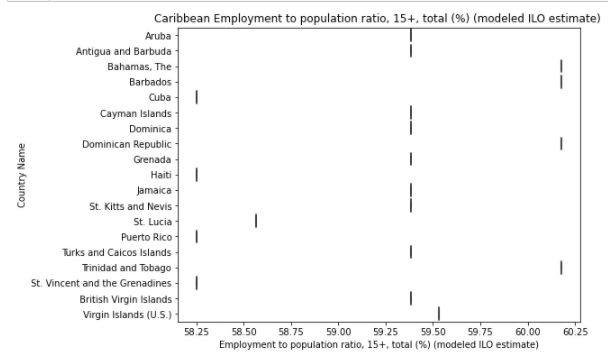

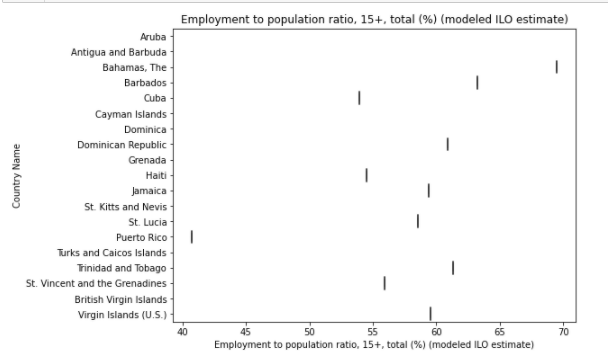

<div style="margin: 2em 5em 0 0; color: ">

## Highlighting the bias 
 
<p>At first glance the three graphs above don't appear to be at all related but in actual fact they are all a representation of the same feature. The largest one has been created using outside data to fill in some of the missing data as well as using the median. The bottom left hand graph was made using only the median to fill in data points and the bottom right is with no missing value repair. These three demonstrate the importance of a good missing value strategy and knowing how it will affect your results before basing any business decisions. 
<p>

In [ ]:
# developing boxplot comparision for GNI and all countries 

fig, ax = plt.subplots(figsize = (8,6))



sns.boxplot(x      = 'GNI per capita, Atlas method (current US$)',  # x-variable
            y      = 'Country Name',     # optional y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = caribbean_subset) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label   = 'Caribbean GNI per capita, Atlas method (current US$) ')
plt.xlabel(xlabel = 'GNI per capita, Atlas method (current US$)')
plt.ylabel(ylabel = 'Country Name')
plt.show()

<div style="margin: 2em 5em 0 0; color: ">

## GNI and Business  

<p>The GNI direct comparison between each individual country reveals a tendency in which countries with close ties to and current European territories have a higher GNI than independent countries. These include Aruba (Dutch), Cayman Islands (UK and tax haven), British Virgin Islands (UK), and Turks and Caicos Islands (UK). We see that even though the country is famous and tourism heavy it does not mean their GNI will represent this. See the Dominican Republic and Jamaica. It can be deduced that there are large hospitality companies who earn the majority of income but it is not distributed equally within the country. We also see that Oil and Gas exporters such as Trinidad and Tobago, as well as Barbados have a higher GNI than countries who are in other industries. And the Cayman Islands also highly profits for their tax laws which make it one of the few world wide tax havens. 
 
<p>

In [ ]:
# developing boxplot comparison for infant mortality and all countries 

fig, ax = plt.subplots(figsize = (8,6))



sns.boxplot(x      = 'Mortality rate, infant (per 1,000 live births)',  # x-variable
            y      = 'Country Name',     # optional y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = caribbean_subset) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label   = 'Caribbean Mortality rate, infant (per 1,000 live births) ')
plt.xlabel(xlabel = 'Mortality rate, infant (per 1,000 live births)')
plt.ylabel(ylabel = 'Country Name')
plt.show()

#We also used median to fill for this feature, more so than for the others as this was missing a bit more data. 

<div style="margin: 2em 5em 0 0; color: ">

## Infant Mortality Rate
 
<p>Though this graph shows more uniformed trends it is important to note that this feature had its missing values filled with the median so there is a degree of bias present. Regardless of bias we can still see that the mortality rate is a bit high in a good portion of the countries. This could be due to many different factors but could be changed through increased access to health care and improved infrastructure. There maybe an opportunity for a floating hospital model to service the smaller more remote islands and more water ambulance companies. <p>

In [ ]:
# developing boxplot comparison for Cell plans and all countries 

fig, ax = plt.subplots(figsize = (8,6))



sns.boxplot(x      = 'Mobile cellular subscriptions (per 100 people)',  # x-variable
            y      = 'Country Name',     # optional y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = caribbean_subset) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label   = 'Caribbean Mobile cellular subscriptions (per 100 people) ')
plt.xlabel(xlabel = 'Mobile cellular subscriptions (per 100 people)')
plt.ylabel(ylabel = 'Country Name')
plt.show()


<div style="margin: 2em 5em 0 0; color: ">

## Mobile Phones 
 
<p>

Except for the countries limited by political or economic issues, the Antilles and Caribbean countries are well connected, when measured in terms of mobile subscriptions. At least the 70% of the countries are close to or higher than 100 cellular subscription per 100 people. There are also no outliers which is unusual compared with the rest of the world. This means in absence of internal variability data, most people who live in the Caribbean area have a or access to a cell phone. With more targeted research a market need could be identifies around this communication reliance. There could be a need for a new provider or a cell tower construction company to improve service. <p>

In [ ]:
#creating data set for the correlation analysis / heatmap generation with just the 5 features chosen

caribbean_2= caribbean_subset[ ['Country Name','CO2 emissions (metric tons per capita)',\
                           'Employment to population ratio, 15+, total (%) (modeled ILO estimate)', \
                           'GNI per capita, Atlas method (current US$)',\
                           'Mortality rate, infant (per 1,000 live births)',\
                           'Mobile cellular subscriptions (per 100 people)'] ]

In [ ]:
# converting correlation matrix into a DataFrame
caribbean_corr = caribbean_2.corr(method = 'pearson').round(decimals= 2)

# specifying plot size (making it bigger)
fig, ax = plt.subplots(figsize=(12,12))


# developing a heatmap
sns.heatmap(data       = caribbean_corr, # the correlation matrix
            cmap       = 'coolwarm',     #color of map
            square     = True,          # tightening the layout
            annot      = True,          # should there be numbers in the heatmap
            linecolor  = 'white',       # lines between boxes
            linewidths = 2)          # how thick should the lines be?


# title and displaying the plot
plt.title("""
Linear Correlation Heatmap for Caribbean Features
""")

plt.show()

<div style="margin: 2em 5em 0 0; color: ">

# Our 5 features and the whole region
 
<p>
    The first interesting point of our heatmap is a lack of correlation between Infant Mortality Rate and Employment Total and even a slight negative correlation between 'Infant Mortality rate' vs. GNI per capita'. This is interesting as one would assume that the amount of people employed and making money would have an effect on the health of a country. The Infant mortality rate is seen by the UN as a strong measure of the overall health of a population as well as it's a measure of wealth. However, our correlation map above fails to show this relationship. This makes us wonder if there may be another "Lurking" variable within the data set that could explain this descrepancy.
    
 The correlation between CO2 and GNI shows a strong positive correlation, though we would have expected this correlation number to be even higher as growing GNI leads to increasing CO2 emissions. For further analysis, the correlation between island size or the main type of transportation(boat, car etc.) vs CO2 can be investigated.
    
Mobile Cellular Subscriptions shows moderate positive linear relationship with CO2 emissions, Employment to population ratio, and GNI per capita which we found as a very outstanding point in our analysis as mobile phones can impact economic development in number of ways. More mobile phones means more mobile-based services, more plug-in stations which is a massive generator of CO2. It creates more businesses around mobile services which leads to increment in employment rates. To uncover the reason of having a moderate correlation instead of high, a potential lurking variable or region infrastructure can be investigated.
    
 

In [ ]:
#Subset for correlation
caribbean_subset_dropped_corr  = caribbean_subset_dropped[['Country Code Total',\
                              'Country Name',\
                             'CO2 emissions (metric tons per capita)',\
                             'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',\
                             'GNI per capita, Atlas method (current US$)',\
                             'Mobile cellular subscriptions (per 100 people)',\
                             'Mortality rate, infant (per 1,000 live births)']]


# Correlation
caribean_countries_corr = caribbean_subset_dropped_corr.corr(method ='pearson').round(decimals = 2)

# specifying plot size (making it bigger)
fig, ax = plt.subplots(figsize=(10,10))


# developing a heatmap
sns.heatmap(data       = caribean_countries_corr, # the correlation matrix
            cmap       = 'coolwarm',     # color
            square     = True,          # 
            annot      = True,          # should there be numbers in the heatmap
            linecolor  = 'white',       # lines between boxes
            linewidths = 0.5)          # how thick should the lines be?


# title and displaying the plot
plt.title("""
Linear Correlation Heatmap for caribean_countries_corr
""")

plt.show()

<div style="margin: 2em 5em 0 0; color: ">

## Comparison of Correlation
 
<p>As we mentioned earlier in our analysis, one of our obstacles was the diversity of the Caribbean and Parts of Latin America as a region. To explore further in that, we created a second heatmap for 5 countries in our region which contained no missing data in the dataset. When the diversity and the variation of countries decreased, a significant increment in the correlation values is observed. Therefore, the variability might be effecting the level of correlations in this analysis.<p> 

<div style="margin: 2em 5em 0 0; color: ">

# Bibliography
<p>

<li>index mundi. (2010). Aruba - Employment to population ratio . Retrieved from Index Mundi: https://www.indexmundi.com/facts/aruba/employment-to-population-ratio</li>
<li>macrotrends. (2020). Aruba GNI Per Capita 1988-2020. Retrieved from Macrotrends: https://www.macrotrends.net/countries/ABW/aruba/gni-per-capita</li>
<li>macrotrends. (2020). Cayman Islands GNI Per Capita 2010-2020. Retrieved from macrotrends: https://www.macrotrends.net/countries/CYM/cayman-islands/gni-per-capita</li>
<li>UNdata. (2010). Per capita GNI at current prices - US dollars. Retrieved from UNData: http://data.un.org/Data.aspx?q=GNI+PER+CAPITA+2010&d=SNAAMA&f=grID%3A103%3BcurrID%3AUSD%3BpcFlag%3A1%3Byr%3A2010</li>
<li>World data atlas. (2018). Puerto Rico - CO2 emissions per capita. Retrieved from Knoema: https://knoema.com/atlas/Puerto-Rico/CO2-emissions-per-capita![image.png](attachment:image.png)</li>
<li>General Law on Environment and Natural Resources (No. 64-00). (2011). (2011). Dominican Republic State Secretariat of Environment and Natural Resources, 132. http://extwprlegs1.fao.org/docs/pdf/dom44863E.pdf</li>
<li>Greenhouse Gas Emissions in the Eastern and Southern Caribbean Region. (2011). USAID, 14. http://www.ipsnews.net/Library/2019/02/2017_USAID_GHG-Emissions-Factsheet_Eastern-and-Southern-Caribbean-Regional.pdf</li>
<li>Lancaster, H. (2020). Dominican Republic - Telecoms, Mobile and Broadband - Statistics and Analyses. BuddeComm. https://www.budde.com.au/Research/Dominican-Republic-Telecoms-Mobile-and-Broadband-Statistics-and-Analyses</li>    
<li>Ortiz, D. (2019, June 24). Corruption Crisis: How Criminal Politicians Poisoned the Dominican Republic. National Interest. https://nationalinterest.org/feature/corruption-crisis-how-criminal-politicians-poisoned-dominican-republic-64091</li>  
<li>World Travel and Tourism Council,. (n.d.). Economic Impact Research. World Travel and Tourism Council. http://wttc.org/Research/Insights/economic-impact-research</li>     
    
</p>



***Special Thank you to Dachao Sun for sharing his html code for the title markdown cell and the headings for this report.***